In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
water = pd.read_excel('../data/preprocessed/water.xlsx', index_col=0)
w_21 = pd.read_excel('../data/rawdata/water/water_2021_06.xlsx')
hth = pd.read_excel('../data/preprocessed/health.xlsx', index_col=0)
wh = pd.read_excel('../data/preprocessed/water_health.xlsx', index_col=0)

C:\Users\sori-\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 수질 분석할 컬럼 정하기
1) 변화가 적은 컬럼보다 max-min이 큰 컬럼으로 선정하여 그래프 그리기 <br>
2) max-min 값이 비슷한 것끼리 같이 그리기
* 과망간산칼륨소비량: 수중에 존재하는 유기물 등에 의해 소비된 과망간산칼륨의 양을 의미

In [9]:
water.head()

,연도,지역,일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),...,클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",포름알데히드(기준:0.5/ 단위:(mg/L))
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.007183,0.002321,0.000000,0.001205,0.000000,0.009164,0.0,0.0,0.0,0.0
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,...,0.016176,0.000315,0.000000,0.000086,0.000000,0.001610,0.0,0.0,0.0,0.0
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,...,0.014198,0.002030,0.000207,0.000954,0.000062,0.009804,0.0,0.0,0.0,0.0
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,...,0.014614,0.005862,0.000372,0.002220,0.000000,0.024049,0.0,0.0,0.0,0.0
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.011760,0.000930,0.000000,0.002256,0.000077,0.012505,0.0,0.0,0.0,0.0


In [19]:
df = water.iloc[:, 2:]
sr = df.max() - df.min()
sr.sort_values(ascending=False, inplace=True)

In [28]:
sr

증발잔류물(기준:500/ 단위:(mg/L))                  230.867264
경도(기준:300/ 단위:(mg/L))                      87.041557
황산이온(기준:200/ 단위:(mg/L))                    67.977848
염소이온(기준:250/ 단위:(mg/L))                    40.040137
일반세균(기준:100/ 단위:(CFU/mL))                   6.666667
수소이온농도(기준:5.8 ~ 8.5/ 단위:-)                  4.615290
과망간산칼륨소비량(기준:10/ 단위:(mg/L))                 3.050226
질산성질소(기준:10/ 단위:(mg/L))                     1.993741
색도(기준:5/ 단위:(도))                            1.177172
잔류염소(기준:4/ 단위:(mg/L))                       0.872749
불소(기준:1.5/ 단위:(mg/L))                       0.440217
붕소(기준:1/ 단위:(mg/L))                         0.090278
알루미늄(기준:0.2/ 단위:(mg/L))                     0.061972
아연(기준:3/ 단위:(mg/L))                         0.050000
톨루엔(기준:0.7/ 단위:(mg/L))                      0.044579
총트리할로메탄(기준:0.1/ 단위:(mg/L))                  0.041806
할로아세틱에시드(기준:0.1/ 단위:(mg/L))                 0.040115
포름알데히드(기준:0.5/ 단위:(mg/L))                   0.032792
클로로포름(기준:0.08/ 단위:(mg/L))                   0.

In [27]:
# 사용할 컬럼 list로 만들기
[sr.index[7]] + list(sr.index[9:19])

['질산성질소(기준:10/ 단위:(mg/L))',
 '잔류염소(기준:4/ 단위:(mg/L))',
 '불소(기준:1.5/ 단위:(mg/L))',
 '붕소(기준:1/ 단위:(mg/L))',
 '알루미늄(기준:0.2/ 단위:(mg/L))',
 '아연(기준:3/ 단위:(mg/L))',
 '톨루엔(기준:0.7/ 단위:(mg/L))',
 '총트리할로메탄(기준:0.1/ 단위:(mg/L))',
 '할로아세틱에시드(기준:0.1/ 단위:(mg/L))',
 '포름알데히드(기준:0.5/ 단위:(mg/L))',
 '클로로포름(기준:0.08/ 단위:(mg/L))']

# Correlation

In [108]:
cor = wh.iloc[:, 2:].corr()
cor

,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),...,브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
일반세균(기준:100),1.000000,0.731231,0.058786,0.003519,-0.005916,NaN,-0.008812,0.007398,0.129937,0.008164,...,-0.092838,-0.022147,-0.035964,-0.013906,-0.196372,0.026594,-0.004459,0.013860,0.011585,0.137413
납(기준:0.01),0.731231,1.000000,0.101865,-0.026561,-0.031009,NaN,-0.010461,0.032875,0.025721,0.022266,...,-0.099403,0.036050,-0.048058,0.005258,-0.231496,-0.042324,0.037689,0.080771,0.007554,0.122314
불소(기준:1.5),0.058786,0.101865,1.000000,0.010381,-0.046251,NaN,0.021502,-0.043009,0.043966,0.057376,...,0.210089,0.405762,0.232935,0.058673,0.073334,-0.156233,-0.247057,-0.250123,0.236236,0.085950
비소(기준:0.01),0.003519,-0.026561,0.010381,1.000000,0.042030,NaN,0.216100,0.408681,0.165657,0.019118,...,-0.078555,-0.064971,-0.031353,-0.041089,-0.062494,0.117550,-0.060067,0.059372,0.035712,-0.001463
셀레늄(기준:0.01),-0.005916,-0.031009,-0.046251,0.042030,1.000000,NaN,-0.015903,0.123011,0.150189,-0.032049,...,-0.119356,-0.069763,-0.092357,-0.026135,0.029841,0.077613,-0.060631,0.110406,0.144806,-0.053469
수은(기준:0.001),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시안(기준:0.01),-0.008812,-0.010461,0.021502,0.216100,-0.015903,NaN,1.000000,-0.001444,-0.019669,0.001303,...,0.023766,-0.015431,-0.032622,-0.012806,0.075371,-0.008348,0.095685,0.114297,0.057941,-0.045293
크롬(기준:0.05),0.007398,0.032875,-0.043009,0.408681,0.123011,NaN,-0.001444,1.000000,0.132650,-0.101692,...,-0.170486,-0.107344,-0.065340,-0.009560,-0.005364,0.133530,-0.159292,0.097419,0.096521,-0.090911
암모니아성질소(기준:0.5),0.129937,0.025721,0.043966,0.165657,0.150189,NaN,-0.019669,0.132650,1.000000,-0.239984,...,-0.137217,-0.073500,-0.027542,-0.040883,-0.053088,0.264349,-0.237513,-0.227852,0.081973,0.259913
질산성질소(기준:10),0.008164,0.022266,0.057376,0.019118,-0.032049,NaN,0.001303,-0.101692,-0.239984,1.000000,...,-0.149970,-0.137704,0.160815,-0.016794,-0.271448,-0.157688,0.293494,0.178900,0.115837,0.002298


In [110]:
# 각 건강관련요인 컬럼에서 가장 큰 상관관계지수
for i in range(-6, 0):
    sr = cor.iloc[:-6, i]
    sr = abs(sr[~(sr == 1)]).sort_values(ascending=False)
    max_idx = sr.idxmax()
    max_cor = sr[0]
    print(max_idx, max_cor)

질산성질소(기준:10) 0.27144793287297897
증발잔류물(기준:500) 0.3481050266482788
디브로모클로로메탄(기준:0.1) 0.4300682710271766
알루미늄(기준:0.2) 0.44288464260129373
불소(기준:1.5) 0.23623630972795404
동(기준:1) 0.30896275886471775


In [111]:
# 스트레스 인지율, 우울감 경험률
for i in range(-4, -2):
    sr = cor.iloc[:-6, i]
    sr = abs(sr[~(sr == 1)]).sort_values(ascending=False)
    display(cor.columns[i], sr)

'스트레스인지율'

디브로모클로로메탄(기준:0.1)              0.430068
알루미늄(기준:0.2)                   0.347615
디브로모아세토니트릴(기준:0.1)             0.326778
브로모디클로로메탄(기준:0.03)             0.314072
질산성질소(기준:10)                   0.293494
총트리할로메탄(기준:0.1)                0.286188
황산이온(기준:200)                   0.279639
망간(기준:0.05)                    0.272785
불소(기준:1.5)                     0.247057
암모니아성질소(기준:0.5)                0.237513
증발잔류물(기준:500)                  0.232905
붕소(기준:1)                       0.232230
색도(기준:5)                       0.221664
수소이온농도(기준:5.8 ~ 8.5)           0.189110
다이아지논(기준:0.02)                 0.188199
염소이온(기준:250)                   0.180770
톨루엔(기준:0.7)                    0.179668
트리클로로에틸렌(기준:0.03)              0.178503
크롬(기준:0.05)                    0.159292
동(기준:1)                        0.158863
1,1,1-트리클로로에탄(기준:0.1)          0.151675
과망간산칼륨소비량(기준:10)               0.149601
디클로로메탄(기준:0.02)                0.126034
1,4-다이옥산(기준:0.05)              0.125717
클로로포름(기준:0.08)                 0.116988


'우울감경험률'

알루미늄(기준:0.2)                   0.442885
디브로모클로로메탄(기준:0.1)              0.381836
브로모디클로로메탄(기준:0.03)             0.373367
총트리할로메탄(기준:0.1)                0.251544
불소(기준:1.5)                     0.250123
암모니아성질소(기준:0.5)                0.227852
톨루엔(기준:0.7)                    0.214646
붕소(기준:1)                       0.195890
질산성질소(기준:10)                   0.178900
트리클로로에틸렌(기준:0.03)              0.175355
디브로모아세토니트릴(기준:0.1)             0.156218
1,4-다이옥산(기준:0.05)              0.153376
황산이온(기준:200)                   0.144729
파라티온(기준:0.06)                  0.134413
1,1,1-트리클로로에탄(기준:0.1)          0.134348
과망간산칼륨소비량(기준:10)               0.132755
클로로포름(기준:0.08)                 0.132256
세제(기준:0.5)                     0.126522
시안(기준:0.01)                    0.114297
카바릴(기준:0.07)                   0.113536
셀레늄(기준:0.01)                   0.110406
1,2-디브로모-3-클로로프로판(기준:0.003)    0.106873
페니트로티온(기준:0.04)                0.103043
잔류염소(기준:4)                     0.101877
망간(기준:0.05)                    0.101599


## Correlation Visualisation by Heatmap

In [114]:
# 히트맵 그릴 부분 dataframe
h_map = abs(cor.iloc[-6:, :-6])    # 상관계수 절대값 처리
h_map

,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),암모니아성질소(기준:0.5),질산성질소(기준:10),...,클로로포름(기준:0.08),클로랄하이드레이트(기준:0.03),디브로모아세토니트릴(기준:0.1),디클로로아세토니트릴(기준:0.09),트리클로로아세토니트릴(기준:0.004),할로아세틱에시드(기준:0.1),브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5)
삶의질지수,0.196372,0.231496,0.073334,0.062494,0.029841,NaN,0.075371,0.005364,0.053088,0.271448,...,0.149087,0.077339,0.010184,0.018162,0.057552,0.139242,0.116276,0.147635,0.047429,0.107600
양호한주관적건강수준인지율,0.026594,0.042324,0.156233,0.117550,0.077613,NaN,0.008348,0.133530,0.264349,0.157688,...,0.125749,0.038494,0.025758,0.061283,0.109266,0.125681,0.267194,0.218998,0.220434,0.084801
스트레스인지율,0.004459,0.037689,0.247057,0.060067,0.060631,NaN,0.095685,0.159292,0.237513,0.293494,...,0.116988,0.059236,0.326778,0.046120,0.062953,0.100205,0.314072,0.430068,0.125717,0.092929
우울감경험률,0.013860,0.080771,0.250123,0.059372,0.110406,NaN,0.114297,0.097419,0.227852,0.178900,...,0.132256,0.063676,0.156218,0.002065,0.021919,0.018600,0.373367,0.381836,0.153376,0.061089
주관적구강건강이나쁜인구의분율,0.011585,0.007554,0.236236,0.035712,0.144806,NaN,0.057941,0.096521,0.081973,0.115837,...,0.124643,0.056629,0.076785,0.101854,0.071816,0.179027,0.203190,0.051305,0.019607,0.023648
연간보건기관이용률,0.137413,0.122314,0.085950,0.001463,0.053469,NaN,0.045293,0.090911,0.259913,0.002298,...,0.099704,0.047460,0.237454,0.127357,0.179079,0.145381,0.256526,0.238984,0.085586,0.130599


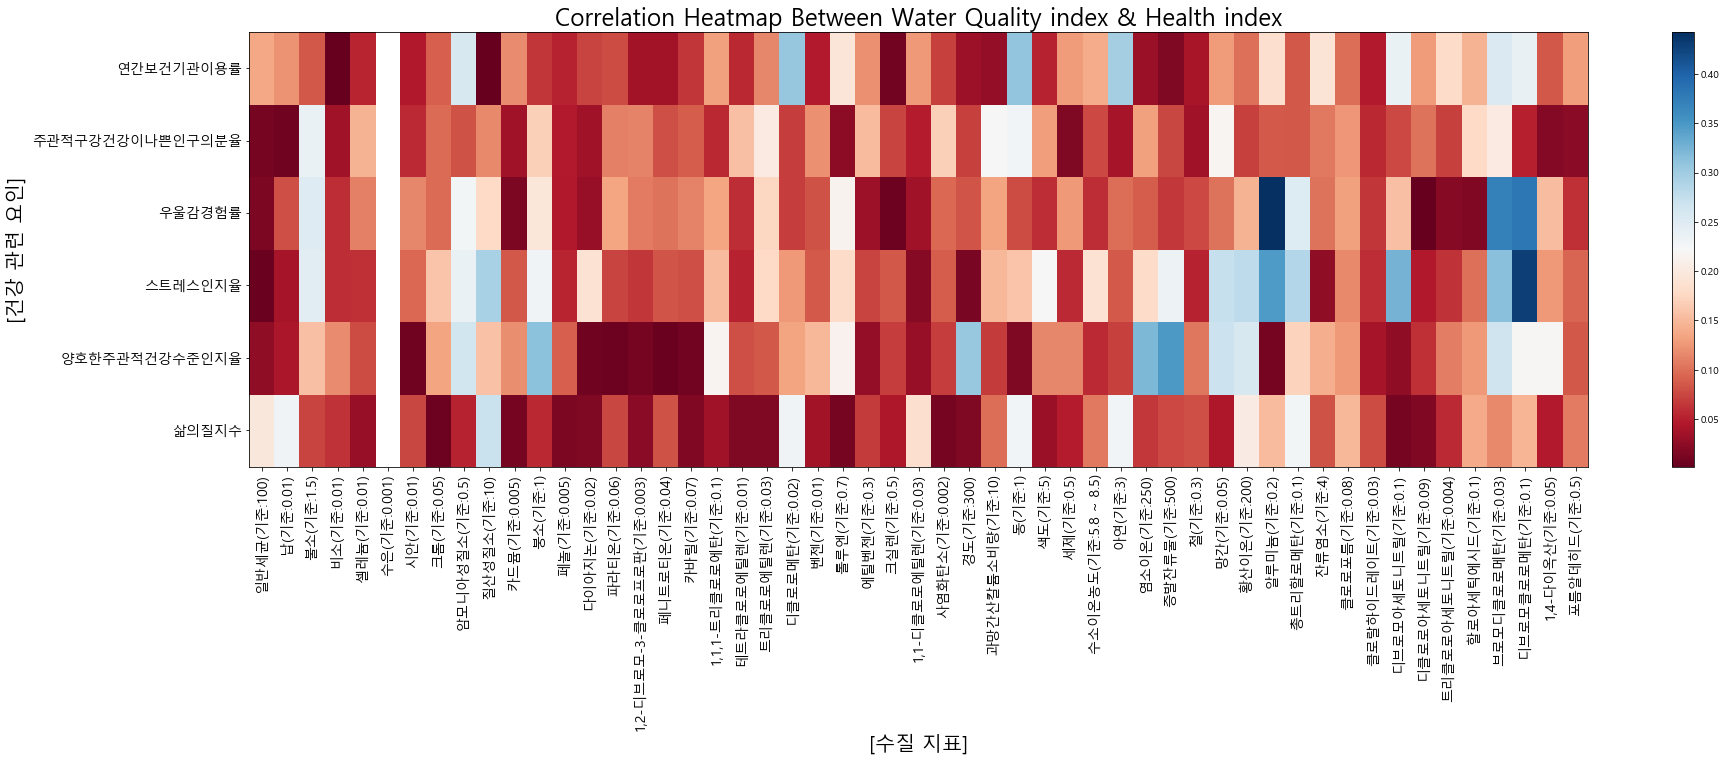

In [115]:
plt.figure(figsize=(30, 8))
plt.rc('font', family='Malgun Gothic')  

plt.pcolor(h_map, cmap='RdBu')  

plt.xticks(np.arange(h_map.shape[1]) + 0.5, labels=h_map.columns, rotation=90, fontsize=14)    # 길어서 겹치므로 회전시킴
plt.yticks(np.arange(h_map.shape[0]) + 0.5, labels=h_map.index, fontsize=14)

plt.title('Correlation Heatmap Between Water Quality index & Health index', fontsize=24)
plt.xlabel('[수질 지표]', fontsize=20)
plt.ylabel('[건강 관련 요인]', fontsize=20) 

plt.colorbar()
plt.show()

> 절대값 처리하지 않은 상관계수는 가장 큰 값(-0.5, 0.5)이 Red, Blue로 나뉘어서 가독성이 떨어짐

## Linear Regression

In [116]:
wh.head()

,연도,지역,일반세균(기준:100),납(기준:0.01),불소(기준:1.5),비소(기준:0.01),셀레늄(기준:0.01),수은(기준:0.001),시안(기준:0.01),크롬(기준:0.05),...,브로모디클로로메탄(기준:0.03),디브로모클로로메탄(기준:0.1),"1,4-다이옥산(기준:0.05)",포름알데히드(기준:0.5),삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
0,2008,서울특별시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.966,51.0,30.6,8.1,29.7,0.0
1,2008,부산광역시,0.0,0.0,0.033310,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.964,48.3,29.8,6.8,35.0,0.0
2,2008,대구광역시,0.0,0.0,0.102339,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.963,46.4,30.1,7.2,37.7,0.0
3,2008,인천광역시,0.0,0.0,0.000000,0.0,0.000399,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.962,49.8,27.3,8.8,35.1,0.0
4,2008,광주광역시,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.951,48.4,26.8,8.7,35.4,0.0


### Combination 1

In [118]:
x = wh[['질산성질소(기준:10)', '망간(기준:0.05)', '황산이온(기준:200)', '알루미늄(기준:0.2)', '총트리할로메탄(기준:0.1)', 
        '디브로모아세토니트릴(기준:0.1)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
y = wh['스트레스인지율']

In [119]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [121]:
# Train & Test data
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=5)
x_train.shape, y_test.shape

((137, 8), (60,))

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [129]:
lr.score(x_test, y_test)

0.3128501028947053

### Combimation 2

In [131]:
x2 = wh[['알루미늄(기준:0.2)', '디브로모아세토니트릴(기준:0.1)', '디브로모클로로메탄(기준:0.1)']]
y2 = wh['스트레스인지율']

scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2_scaled, y2, test_size=0.3, random_state=5)
x2_train.shape, y2_test.shape

lr = LinearRegression()
lr.fit(x2_train, y2_train)

lr.score(x2_test, y2_test)

0.2530045566168384

### Combination 3

In [137]:
x3 = wh[['알루미늄(기준:0.2)', '브로모디클로로메탄(기준:0.03)', '디브로모클로로메탄(기준:0.1)']]
y3 = wh['우울감경험률']

scaler = StandardScaler()
x3_scaled = scaler.fit_transform(x3)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3_scaled, y3, test_size=0.3, random_state=5)
x3_train.shape, y3_test.shape

lr = LinearRegression()
lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test)

0.2484828674524444

> 생각보다 크게 상관관계 없음

# Health Index on KaKao Map
* Website: Time Genie https://kor.timegenie.com/latitude_longitude/country/kr
* 전라북도의 위도, 경도는 전주로 대신한다

## Web Scraping for Latitude & Longitude

In [139]:
import requests
from bs4 import BeautifulSoup

In [146]:
req = requests.get('https://kor.timegenie.com/latitude_longitude/country/kr')
soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <title>
   위도 경도 :: 대한민국 :: Time Genie
  </title>
  <meta charset="utf-8"/>
  <link href="https://kor.timegenie.com/latitude_longitude/country/kr" rel="canonical"/>
  <link href="https://kor.timegenie.com/amp/latitude_longitude/country/kr" rel="amphtml">
   <link href="https://kor.timegenie.com/mobi/latitude_longitude/country/kr" media="handheld" rel="alternate"/>
   <meta content="width=device-width,minimum-scale=1,initial-scale=1" name="viewport"/>
   <meta content="ko" http-equiv="content-language"/>
   <style>
    /* RTL */ body.rtl { direction: rtl; } body.rtl span.likeshare { float: left; direction: ltr; } body.rtl div.content { text-align: right; } body.rtl span.time24 { float: left; padding: 0px 0px 0px 10px; } body.rtl .links span { float: left; } body.rtl .links i { float: left; } body.rtl .searchMatch span { float: left; } body.rtl .promo span { float: left; } body.rtl p.indent { margin-right: 50px; direction: ltr; } /* Main */ body

**만들고자 하는 테이블 형태** <br>
[['서울특별시', 38, 127],  <br>
 ['부산광역시', xx, xxx],  <br>
 ...                   ]

In [158]:
# 지역 추출
locs = []

for loc in soup.select('a.links > h5'):
    locs.append(loc.text)
locs = locs[:-2]  # 마지막에 이상한 값도 포함됨
len(locs)

100

In [162]:
# 위도 추출
lats = []
mixed = soup.select('div.links > h5')

for i in range(1, len(mixed), 2):
    lats.append(mixed[i].text)
lats = lats[:-2]
len(lats)

100

In [165]:
# 경도 추출
lngs = []
mixed = soup.select('div.links > span')

for i in range(1, len(mixed), 2):
    lngs.append(mixed[i].text)
len(lngs)

100

In [177]:
# Combine as a dataframe
location = pd.DataFrame({'지역':locs, '위도':lats, '경도':lngs})
location.to_excel('../data/preprocessed/loc.xlsx')
print('저장 완료---------------------------------')

저장 완료---------------------------------


**지역**: ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'] <br>
**위도, 경도 찾을 때**: ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '수원시', '원주시', '청주시', '천안시', '전주시', '광주시', '안동시', '창원시', '제주시']
> 충청남도 수도가 대전광역시로 겹쳐서 천안시로 지정<br>
> 강원도 수도 춘천시는 위도, 경도 정보가 없어서 원주시로 대체

In [227]:
location[location['지역'] == '세종특별자치시']

,지역,위도,경도
22,세종특별자치시,36.48750,127.28167


## Infowindow Content Generation

In [232]:
yr_hth = hth[hth['연도'] == 2016]
yr_hth.set_index('지역', inplace=True)
yr_hth.drop('연도', axis=1, inplace=True)
yr_hth

C:\Users\sori-\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,삶의질지수,양호한주관적건강수준인지율,스트레스인지율,우울감경험률,주관적구강건강이나쁜인구의분율,연간보건기관이용률
지역,,,,,,
서울특별시,0.956,46.9,30.1,6.9,26.2,18.4
부산광역시,0.954,43.3,27.0,5.8,31.2,19.9
대구광역시,0.960,42.4,26.6,4.9,26.9,19.7
인천광역시,0.951,44.4,30.5,6.9,31.6,21.0
광주광역시,0.958,45.7,28.7,4.6,31.7,18.3
대전광역시,0.957,51.5,31.5,7.4,23.9,16.9
울산광역시,0.963,43.6,24.9,3.8,29.6,24.9
세종특별자치시,0.958,49.2,25.0,4.9,26.6,26.7
경기도,0.954,44.4,30.3,6.5,29.0,21.0


In [233]:
# 지역(시도)마다 인포윈도우에 띄울 string을 담은 list 만들기
contents = []  

for idx in yr_hth.index:
    sr = yr_hth.loc[idx]
    
    string = '<div style="padding:5px;">'     # Kakao Map에 바로 사용할 수 있는 형식: <div style="padding:5px;">Hello World!<br></div>'
    for s in zip(sr.index, sr.values):
        #print(type(s[0]), type(s[1]))      # str, numpy.float64
        string += s[0] + ': ' + str(s[1]) + '<br>' 
    string += '<div>'
    contents.append(string)
 
contents

['<div style="padding:5px;">삶의질지수: 0.956<br>양호한주관적건강수준인지율: 46.9<br>스트레스인지율: 30.1<br>우울감경험률: 6.9<br>주관적구강건강이나쁜인구의분율: 26.2<br>연간보건기관이용률: 18.4<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.954<br>양호한주관적건강수준인지율: 43.3<br>스트레스인지율: 27.0<br>우울감경험률: 5.8<br>주관적구강건강이나쁜인구의분율: 31.2<br>연간보건기관이용률: 19.9<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.96<br>양호한주관적건강수준인지율: 42.4<br>스트레스인지율: 26.6<br>우울감경험률: 4.9<br>주관적구강건강이나쁜인구의분율: 26.9<br>연간보건기관이용률: 19.7<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.951<br>양호한주관적건강수준인지율: 44.4<br>스트레스인지율: 30.5<br>우울감경험률: 6.9<br>주관적구강건강이나쁜인구의분율: 31.6<br>연간보건기관이용률: 21.0<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.958<br>양호한주관적건강수준인지율: 45.7<br>스트레스인지율: 28.7<br>우울감경험률: 4.6<br>주관적구강건강이나쁜인구의분율: 31.7<br>연간보건기관이용률: 18.3<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.957<br>양호한주관적건강수준인지율: 51.5<br>스트레스인지율: 31.5<br>우울감경험률: 7.4<br>주관적구강건강이나쁜인구의분율: 23.9<br>연간보건기관이용률: 16.9<br><div>',
 '<div style="padding:5px;">삶의질지수: 0.963<br>양호한주관적건강수준인지율: 43.6<br>스트레스인지율: 24.9<br>우울감경험률: 3.8

In [234]:
# 지역 & 인포윈도의 string으로 dataframe 만들기
info = pd.DataFrame({'인포윈도우':contents}, index=yr_hth.index)
info

,인포윈도우
지역,
서울특별시,"<div style=""padding:5px;"">삶의질지수: 0.956<br>양호한주..."
부산광역시,"<div style=""padding:5px;"">삶의질지수: 0.954<br>양호한주..."
대구광역시,"<div style=""padding:5px;"">삶의질지수: 0.96<br>양호한주관..."
인천광역시,"<div style=""padding:5px;"">삶의질지수: 0.951<br>양호한주..."
광주광역시,"<div style=""padding:5px;"">삶의질지수: 0.958<br>양호한주..."
대전광역시,"<div style=""padding:5px;"">삶의질지수: 0.957<br>양호한주..."
울산광역시,"<div style=""padding:5px;"">삶의질지수: 0.963<br>양호한주..."
세종특별자치시,"<div style=""padding:5px;"">삶의질지수: 0.958<br>양호한주..."
경기도,"<div style=""padding:5px;"">삶의질지수: 0.954<br>양호한주..."


In [235]:
info.loc['세종특별자치시', '인포윈도우']

'<div style="padding:5px;">삶의질지수: 0.958<br>양호한주관적건강수준인지율: 49.2<br>스트레스인지율: 25.0<br>우울감경험률: 4.9<br>주관적구강건강이나쁜인구의분율: 26.6<br>연간보건기관이용률: 26.7<br><div>'

# Spider Chart
* Reference: https://www.incheon.go.kr/water/WA030204
* 수돗물의 먹는물로서의 수질지표로 중요하지만, 모두 "적합"이라 배제되었던 항목에 대한 차트 - **잔류염소, 아연, 철, 망간, 탁도** 
* 가장 최신 데이터인 **2021년 6**월 **서울과 다른 지역**을 비교하여 비슷한지 확인하는 것이 목표(raw data 사용해야 함)
* Chart code reference: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals

## Preprocess Raw Data  for Spider Plot

In [286]:
# 검사월으로 쉽게 indexing할 수 있도록 Time Series로 변환
# w_21['검사월'] = pd.to_datetime(w_121['검사월'])
w_21['검사월'] = w_21['검사월'].astype(str).astype('datetime64')   # 위 아래는 결과가 같음. str -> datetime64
w_21.set_index('검사월', inplace=True)
w_21.index                 # DatetimeIndex, freq가 잘못되었지만 다시 설정할 수가 없다...그런데 딱히 문제는 안됨

DatetimeIndex(['2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01', '2021-01-01', '2021-01-01',
               '2021-01-01', '2021-01-01',
               ...
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01', '2021-06-01', '2021-06-01',
               '2021-06-01', '2021-06-01'],
              dtype='datetime64[ns]', name='검사월', length=2418, freq=None)

In [316]:
# 수도사업자명 강원도 강릉시, 삼척시 등을 모두 강원도로 만들어서 groupby 할 수 있도록 함
split = w_21['수도사업자'].str.split()
w_21['수도사업자'] = split.str.get(0)
w_21.tail()

,수도사업자,시설명,소재지,수원,시설용량(㎥/일),채수년월일,일반세균(기준:100/ 단위:(CFU/mL)),총대장균군(기준:0/ 단위:MPN),대장균/분원성대장균군(기준:0/ 단위:MPN),납(기준:0.01/ 단위:(mg/L)),...,잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
검사월,,,,,,,,,,,,,,,,,,,,,
2021-06-01,수자원공사,평림,NaN,호소수,30000,2021-06-02,0,불검출,불검출,0.0,...,0.86,0.015,0.0070,0.0,0.0032,0.0,0.009,0.006,0.0,0.0
2021-06-01,수자원공사,학야,NaN,호소수,61900,2021-06-03,0,불검출,불검출,0.0,...,0.51,0.029,0.0028,0.0,0.0017,0.0,0.045,0.003,0.0,0.0
2021-06-01,수자원공사,화순,NaN,호소수,100000,2021-06-02,0,불검출,불검출,0.0,...,0.57,0.009,0.0036,0.0,0.0016,0.0,0.009,0.000,0.0,0.0
2021-06-01,수자원공사,황지,강원도 태백시 황지동,호소수,70000,2021-06-08,0,불검출,불검출,0.0,...,0.69,0.018,0.0016,0.0,0.0014,0.0,0.018,0.004,0.0,0.0
2021-06-01,수자원공사,화성,경기도 화성시 매송면 천천리,호소수,178000,2021-06-07,0,불검출,불검출,0.0,...,0.78,0.017,0.0000,0.0,0.0000,0.0,0.001,0.007,0.0,0.0


In [337]:
df = w_21['2021-06']
df = df[['수도사업자', '시설용량(㎥/일)', '잔류염소(기준:4/ 단위:(mg/L))', '아연(기준:3/ 단위:(mg/L))', '철(기준:0.3/ 단위:(mg/L))', '망간(기준:0.05/ 단위:(mg/L))', '탁도(기준:0.5/ 단위:(NTU))']]
df.columns = ['지역', '시설용량', '잔류염소', '아연', '철', '망간', '탁도']
df.head()

C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,지역,시설용량,잔류염소,아연,철,망간,탁도
검사월,,,,,,,
2021-06-01,서울특별시,1000000,0.46,0.00,0.0,0.0,0.06
2021-06-01,서울특별시,400000,0.36,0.01,0.0,0.0,0.06
2021-06-01,서울특별시,500000,0.46,0.00,0.0,0.0,0.06
2021-06-01,서울특별시,700000,0.48,0.00,0.0,0.0,0.07
2021-06-01,서울특별시,1600000,0.55,0.00,0.0,0.0,0.06


In [338]:
# 각 지역 6월 평균 농도 - 탁도의 경우, 단위 아니라 가중치를 이용한 평균을 구함
sr_list = []
for col in df.columns[2:]:
    sr = df.groupby('지역').apply(lambda x: (x['시설용량'] * x[col]).sum() / x['시설용량'].sum())
    sr_list.append(sr)

df_21 = pd.DataFrame(sr_list, index=['잔류염소', '아연', '철', '망간', '탁도']).T  # Series는 행으로 들어감
df_21.reset_index(inplace=True)

In [339]:
df_21.shape  # raw data를 찾아보니 6월에는 9개 지역만 있는게 맞음!

(9, 6)

## Spider Plot

In [331]:
from math import pi

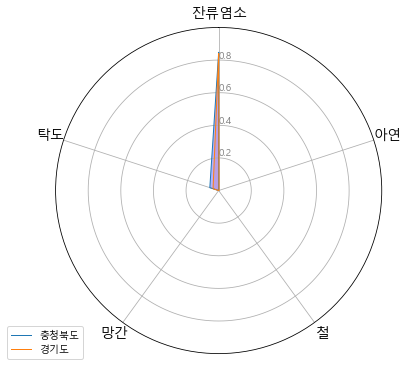

In [459]:
# PART 1: Create background
 
# number of variable
categories = list(df_21)[1:]          # list(dataframe): 컬럼명
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]    # pi = 180도, n/5 * 2pi = 360도에서 n/5 만큼의 각
angles += angles[:1]     # 다시 원점까지 연결된 모양을 그리기 위해서

# Initialise the spider plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)       # 원래 0도가 오른쪽에서 시작하는 것을 왼쪽으로 90도 돌림
ax.set_theta_direction(-1)        # -1: 각도 증가 시계방향, 1: 반시계방향

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, fontsize=14)
 
# Draw ylabels
ax.set_rlabel_position(0)         # tick label이 적히는 각도 
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=10)
plt.ylim(0, 1)


# PART 2: Add plots----------------------------------------------------------------------------------------------
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1 - 서울특별시
values = df_21.loc[8].drop('지역').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="충청북도")
ax.fill(angles, values, 'b', alpha=0.3)
 
# # Ind2 - 경기도
values = df_21.loc[1].drop('지역').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="경기도")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))    # bbox 안에서 upper right\

# Save figure
plt.savefig('../static/assets/images/gg_cb.png')
plt.show()

In [431]:
df_21

,지역,잔류염소,아연,철,망간,탁도
0,강원도,0.602971,0.013246,0.000000,0.000000,0.118582
1,경기도,0.837803,0.002220,0.000000,0.000000,0.036078
2,경상남도,0.403922,0.002394,0.000000,0.000200,0.089143
3,경상북도,0.753382,0.004943,0.000000,0.000000,0.049574
4,서울특별시,0.497262,0.000811,0.000000,0.000000,0.062901
5,수자원공사,0.804027,0.000677,0.000000,0.000000,0.055068
6,전라남도,0.417196,0.007261,0.000187,0.002302,0.065578
7,충청남도,0.846479,0.000254,0.000000,0.000000,0.084718
8,충청북도,0.846659,0.000187,0.000445,0.000000,0.056993


# Comparison with the Standard limit

## Underground Water Analysis
지하수 원수 수질 검사 항목 중 검출량이 있는 **질산성 질소**의 농도를 기준치와 비교
* Seaborn을 통해 Barchart를 그리게 되면 자동으로 지역을 그룹화하여 물질 농도를 평균 구할 수 있음
* 지하수의 경우 시설용량(가중치)이 없어서 농도값들의 평균을 바로 이용하도록 함

In [510]:
ug = pd.read_excel('../data/rawdata/underground_water.xlsx', engine='openpyxl')
ug.tail()

,검사년도,검사반기,수도사업자,취수장명,측정지점명,측정지점주소,채수지점구분,정수장명,수원,채수년월일,...,질산성질소(기준:10/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),음이온 계면활성제(기준:0/ 단위:(mg/L))
144,2021,상반기,충청북도 청주시,낭성 #2관정,낭성 2,충청북도 청주시 상당구 낭성면 이목리 865,취수구,낭성,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
145,2021,상반기,충청북도 청주시,미원 #1관정,미원 1,충청북도 청주시 상당구 미원면 쌍이리 393,취수구,미원,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
146,2021,상반기,충청북도 청주시,미원 #2관정,미원 2,충청북도 청주시 상당구 미원면 내산리 962,취수구,미원,지하수,20210615,...,2.4,0,0,0,0,0,0,0,0,0
147,2021,상반기,충청북도 청주시,미원 #3관정,미원 3,충청북도 청주시 상당구 미원면 내산리 519,취수구,미원,지하수,20210615,...,3.8,0,0,0,0,0,0,0,0,0
148,2021,상반기,충청북도 청주시,미원 #4관정,미원 4,충청북도 청주시 상당구 미원면 미원리 568,취수구,미원,지하수,20210615,...,2.9,0,0,0,0,0,0,0,0,0


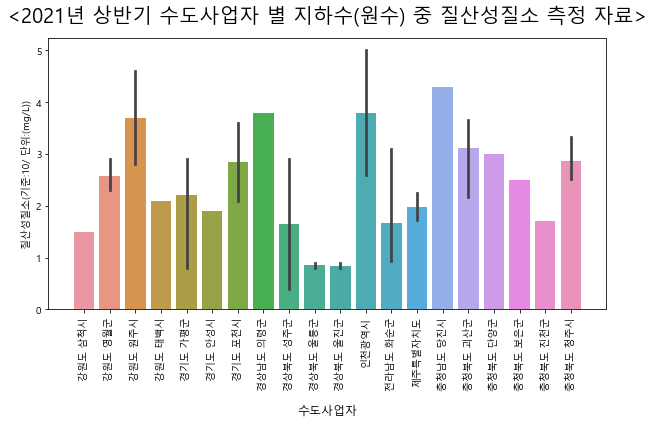

In [483]:
plt.figure(figsize=(10, 5))

sns.barplot(x='수도사업자', y='질산성질소(기준:10/ 단위:(mg/L))', data=ug)

plt.title('<2021년 상반기 수도사업자 별 지하수(원수) 중 질산성질소 측정 자료>', fontsize=20, pad=15)
plt.xlabel('수도사업자', fontsize=12, labelpad=15)
plt.xticks(rotation=90)
plt.show()

위는 평균값만 나와서 값들 중 기준치를 벗어나는 경우가 있어도 확인할 수 없음 -> **Boxplot**으로 interquartile과 outlier를 확인

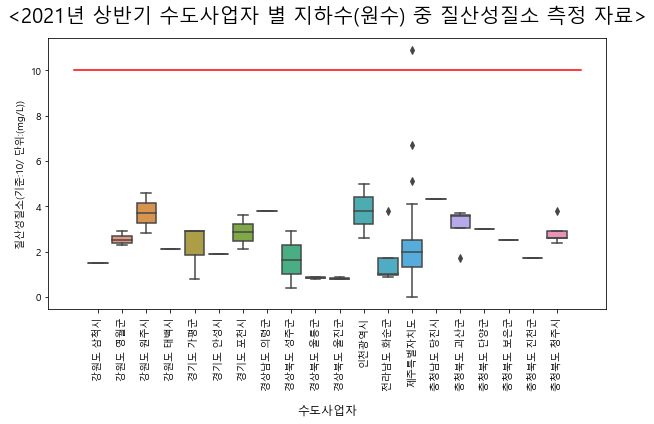

In [550]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='수도사업자', y='질산성질소(기준:10/ 단위:(mg/L))', data=ug)

# 기준선 line plot
x = np.arange(-1, 21)
y = x*0 + 10
plt.plot(x, y, '-r')

plt.title('<2021년 상반기 수도사업자 별 지하수(원수) 중 질산성질소 측정 자료>', fontsize=20, pad=15)
plt.xlabel('수도사업자', fontsize=12, labelpad=15)
plt.xticks(rotation=90)
plt.show()

In [534]:
# x축 표시 이름
ug['취수장명'] = ug['수도사업자'] + '/' + ug['취수장명']

In [535]:
ug

,검사년도,검사반기,수도사업자,취수장명,측정지점명,측정지점주소,채수지점구분,정수장명,수원,채수년월일,...,질산성질소(기준:10/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),음이온 계면활성제(기준:0/ 단위:(mg/L))
0,2021,상반기,강원도 삼척시,강원도 삼척시/임원,임원,강원도 삼척시 원덕읍 임원리 915,착수정,임원,지하수,20210603,...,1.5,0,0,0,0,0,0,0,0,0
1,2021,상반기,강원도 영월군,강원도 영월군/영월,영월,강원도 영월군 영월읍 영흥리 산382,취수구,영월,지하수,20210603,...,2.5,0,0,0,0,0,0,0,0,0
2,2021,상반기,강원도 영월군,강원도 영월군/주천,주천,강원도 영월군 주천면 도천길 673,취수구,주천,지하수,20210603,...,2.9,0,0,0,0,0,0,0,0,0
3,2021,상반기,강원도 영월군,강원도 영월군/하동,하동,강원도 영월군 김삿갓면 강변로 1462-23,취수구,하동,지하수,20210603,...,2.3,0,0,0,0,0,0,0,0,0
4,2021,상반기,강원도 원주시,강원도 원주시/귀래,귀래,강원도 원주시 귀래면 한치길 1141,취수구,귀래정수장,지하수,20210608,...,2.8,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2021,상반기,충청북도 청주시,충청북도 청주시/낭성 #2관정,낭성 2,충청북도 청주시 상당구 낭성면 이목리 865,취수구,낭성,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
145,2021,상반기,충청북도 청주시,충청북도 청주시/미원 #1관정,미원 1,충청북도 청주시 상당구 미원면 쌍이리 393,취수구,미원,지하수,20210615,...,2.6,0,0,0,0,0,0,0,0,0
146,2021,상반기,충청북도 청주시,충청북도 청주시/미원 #2관정,미원 2,충청북도 청주시 상당구 미원면 내산리 962,취수구,미원,지하수,20210615,...,2.4,0,0,0,0,0,0,0,0,0
147,2021,상반기,충청북도 청주시,충청북도 청주시/미원 #3관정,미원 3,충청북도 청주시 상당구 미원면 내산리 519,취수구,미원,지하수,20210615,...,3.8,0,0,0,0,0,0,0,0,0


In [536]:
# 질산성 질소 높은 순으로 15개만 추출해서 기준치 근처값만 보기
no3 = ug.sort_values('질산성질소(기준:10/ 단위:(mg/L))', ascending=False, ignore_index=True)
no3 = no3.loc[0:14, ['취수장명', '질산성질소(기준:10/ 단위:(mg/L))']]    # 수도사업자로 하면 중복해서 유일한 값인 취수장명을 사용
no3.set_index('취수장명', inplace=True)
no3

,질산성질소(기준:10/ 단위:(mg/L))
취수장명,
제주특별자치도/옹포수원,10.9
제주특별자치도/회천광역수원,6.7
제주특별자치도/회천광역수원,5.1
인천광역시/길상,5.0
강원도 원주시/신림,4.6
충청남도 당진시/합덕,4.3
제주특별자치도/상예수원 대왕수,4.1
제주특별자치도/회천광역수원,4.1
경상남도 의령군/서동,3.8


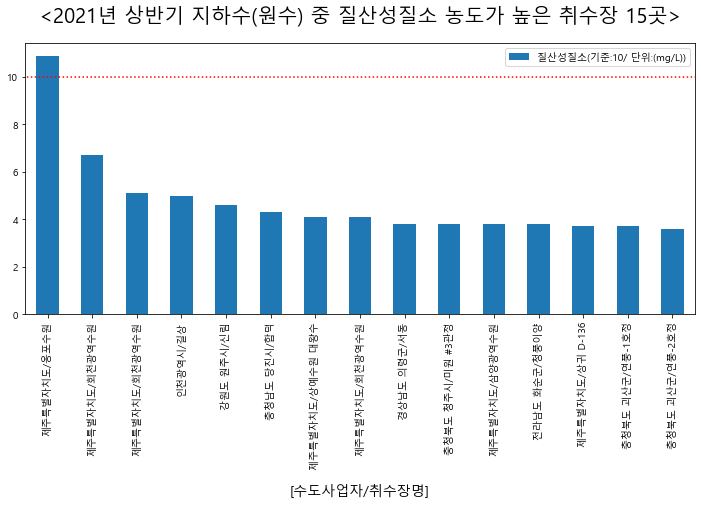

In [551]:
# 그룹화하지 않을 것이기 때문에 matplotlib 사용
no3.plot(kind='bar', figsize=(12, 5))

# 기준선 line plot
x = np.arange(-1, 16)
y = x*0 + 10
plt.plot(x, y, ':r')

plt.title('<2021년 상반기 지하수(원수) 중 질산성질소 농도가 높은 취수장 15곳>', fontsize=20, pad=20)
plt.xlabel('[수도사업자/취수장명]', fontsize=14, labelpad=15)

plt.show()

## Radon in Tap Water
* 라돈 기준: 148 (Bq/L)

In [554]:
rd = pd.read_excel('../data/rawdata/radon.xlsx', engine='openpyxl')
rd.head()    

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon
0,2021,상반기,부산광역시,A고지,부산광역시 강서구,지하수,40.0,20210527,0.0
1,2021,상반기,부산광역시,고촌1,부산광역시 기장군,지하수,100.0,20210511,0.0
2,2021,상반기,부산광역시,구칠,부산광역시 기장군,지하수,100.0,20210513,0.0
3,2021,상반기,부산광역시,덕산,부산광역시 기장군,지하수,100.0,20210506,8.3
4,2021,상반기,부산광역시,덕천,부산광역시 북구,지하수,140.0,20210503,16.3


In [555]:
rd.sort_values('Radon', ascending=False, ignore_index=True, inplace=True)
rd

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon
0,2021,상반기,충청북도 음성군,선골,충청북도 음성군,지하수,40.0,20200730,712.0
1,2021,상반기,경상북도 상주시,덕암동(선돌),경상북도 상주시,지하수,70.0,20210419,447.6
2,2021,상반기,충청북도 음성군,수리울,충청북도 음성군,지하수,300.0,20200729,437.8
3,2021,상반기,충청남도 천안시,도림1리(보덕),충청남도 천안시,지하수,30.0,20210609,330.9
4,2021,상반기,충청남도 천안시,호당1리(효견),충청남도 천안시,지하수,24.0,20210609,315.3
...,...,...,...,...,...,...,...,...,...
5947,2021,상반기,경상북도 울진군,내선미,경상북도 울진군,지하수,71.0,20210512,0.0
5948,2021,상반기,경상북도 울진군,나실,경상북도 울진군,지하수,54.0,20210524,0.0
5949,2021,상반기,경상북도 울진군,금강송에코리움,경상북도 울진군,지하수,197.0,20210524,0.0
5950,2021,상반기,경상북도 영주시,점마,경상북도 영주시,지하수,198.0,20210514,0.0


In [556]:
# x축 고려해서 소재지 + 시설명 만들기
rd['소재지 / 정수장명'] = rd['소재지'] + ' / ' + rd['시설명']
rd

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon,소재지 / 정수장명
0,2021,상반기,충청북도 음성군,선골,충청북도 음성군,지하수,40.0,20200730,712.0,충청북도 음성군 / 선골
1,2021,상반기,경상북도 상주시,덕암동(선돌),경상북도 상주시,지하수,70.0,20210419,447.6,경상북도 상주시 / 덕암동(선돌)
2,2021,상반기,충청북도 음성군,수리울,충청북도 음성군,지하수,300.0,20200729,437.8,충청북도 음성군 / 수리울
3,2021,상반기,충청남도 천안시,도림1리(보덕),충청남도 천안시,지하수,30.0,20210609,330.9,충청남도 천안시 / 도림1리(보덕)
4,2021,상반기,충청남도 천안시,호당1리(효견),충청남도 천안시,지하수,24.0,20210609,315.3,충청남도 천안시 / 호당1리(효견)
...,...,...,...,...,...,...,...,...,...,...
5947,2021,상반기,경상북도 울진군,내선미,경상북도 울진군,지하수,71.0,20210512,0.0,경상북도 울진군 / 내선미
5948,2021,상반기,경상북도 울진군,나실,경상북도 울진군,지하수,54.0,20210524,0.0,경상북도 울진군 / 나실
5949,2021,상반기,경상북도 울진군,금강송에코리움,경상북도 울진군,지하수,197.0,20210524,0.0,경상북도 울진군 / 금강송에코리움
5950,2021,상반기,경상북도 영주시,점마,경상북도 영주시,지하수,198.0,20210514,0.0,경상북도 영주시 / 점마


In [557]:
# 기준치 이상인 곳만 추출
rd148 = rd[rd['Radon'] > 148]
rd148

,검사년도,검사반기,행정구역,시설명,소재지,수원,시설용량(㎥/일),검사일,Radon,소재지 / 정수장명
0,2021,상반기,충청북도 음성군,선골,충청북도 음성군,지하수,40.0,20200730,712.0,충청북도 음성군 / 선골
1,2021,상반기,경상북도 상주시,덕암동(선돌),경상북도 상주시,지하수,70.0,20210419,447.6,경상북도 상주시 / 덕암동(선돌)
2,2021,상반기,충청북도 음성군,수리울,충청북도 음성군,지하수,300.0,20200729,437.8,충청북도 음성군 / 수리울
3,2021,상반기,충청남도 천안시,도림1리(보덕),충청남도 천안시,지하수,30.0,20210609,330.9,충청남도 천안시 / 도림1리(보덕)
4,2021,상반기,충청남도 천안시,호당1리(효견),충청남도 천안시,지하수,24.0,20210609,315.3,충청남도 천안시 / 호당1리(효견)
5,2021,상반기,충청남도 부여군,안뜸,충청남도 부여군,지하수,20.0,20210618,289.0,충청남도 부여군 / 안뜸
6,2021,상반기,강원도 정선군,월루3,강원도 정선군,지하수,50.0,20210525,284.1,강원도 정선군 / 월루3
7,2021,상반기,전라남도 강진군,신덕,전라남도 강진군,지하수,8.0,20210218,266.8,전라남도 강진군 / 신덕
8,2021,상반기,충청남도 천안시,서흥1리(동막),충청남도 천안시,지하수,30.0,20210609,241.4,충청남도 천안시 / 서흥1리(동막)
9,2021,상반기,충청남도 부여군,가중2,충청남도 부여군,지하수,60.0,20210520,240.5,충청남도 부여군 / 가중2


### Lollipop Plot

C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


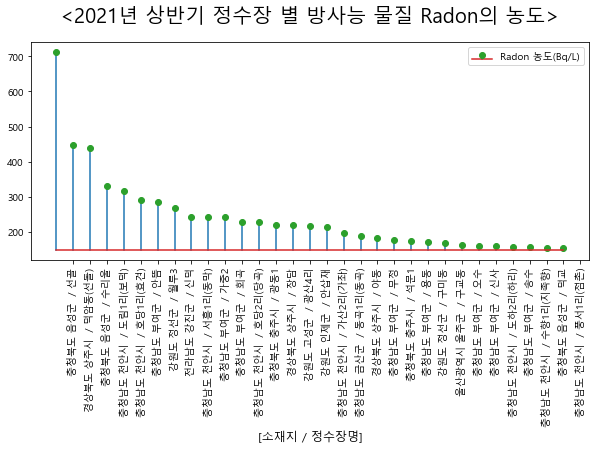

In [573]:
plt.figure(figsize=(10, 4))
plt.stem(rd148['Radon'], markerfmt='C2o', bottom=148, label='Radon 농도(Bq/L)')
plt.xticks(range(1, len(rd148)+1), rd148['소재지 / 정수장명'], rotation=90)

plt.title('<2021년 상반기 정수장 별 방사능 물질 Radon의 농도>', fontsize=20, pad=20)
plt.xlabel('[소재지 / 정수장명]', fontsize=12)

plt.legend()
plt.show()

# Health Data Change by Years
* 연도별 변화 양상을 